# Data Gathering

Pengumpulan data menggunakan teknik web scraping dari https://covid19.go.id/. Langkah yang dikerjakan adalah :
1. Buka laman https://covid19.go.id/peta-sebaran.
2. Klik kanan pada browser, pilih inspect.
3. Pilih tab network - Fetch/XHR, refresh laman web yang sudah terbuka agar inspect network tampil.
4. Cari link API yang dibutuhkan, dalam contoh ini akan diambil data penambahan harian.
5. Klik API yang update.json. Buka URL yang tampil di tab baru untuk mengecek data yang dibutuhkan apakah tersedia.

In [ ]:
# Import Library / Package
import pandas as pd
import numpy as np
import requests
import datetime, time
#import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
!pip install pmdarima
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Memasukkan API yang diperoleh dari web https://covid19.go.id/peta-sebaran.
url_data = 'https://data.covid19.go.id/public/api/update.json?_=1661275302035'
headers = {'User-Agent': 'Chrome'}

data = requests.get(url_data, headers=headers).json() #import .json ke data

# Pre-processing Data

Melakukan tahap cleaning data, menghilangkan variabel-variabel yang tidak diperlukan dalam contoh.

In [ ]:
# Cek elemen data dari .json
data

{'data': {'id': 1,
  'jumlah_odp': 3067,
  'jumlah_pdp': 0,
  'total_spesimen': 107562459,
  'total_spesimen_negatif': 93640596},
 'update': {'penambahan': {'jumlah_positif': 1848,
   'jumlah_meninggal': 17,
   'jumlah_sembuh': 3465,
   'jumlah_dirawat': -1634,
   'tanggal': '2022-09-12',
   'created': '2022-09-12 16:58:23'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_positif_

In [ ]:
print(type(data))

<class 'dict'>


In [ ]:
print(data.keys())

dict_keys(['data', 'update'])


In [ ]:
print(type(data['data']))
print(type(data['update']))

<class 'dict'>
<class 'dict'>


In [ ]:
print(data['data'].keys())
print(data['update'].keys())

dict_keys(['id', 'jumlah_odp', 'jumlah_pdp', 'total_spesimen', 'total_spesimen_negatif'])
dict_keys(['penambahan', 'harian', 'total'])


In [ ]:
print(type(data['update']['harian']))

<class 'list'>


DATA
- data
- update: penambahan, harian, total

update harian list didalamnyta ada dictionary (925 dict)

In [ ]:
data['update']['harian']

[{'key_as_string': '2020-03-02T00:00:00.000Z',
  'key': 1583107200000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 2},
  'jumlah_dirawat': {'value': 2},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-03T00:00:00.000Z',
  'key': 1583193600000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-04T00:00:00.000Z',
  'key': 1583280000000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_posi

In [ ]:
len(data['update']['harian'])

925

In [ ]:
data['update']['harian'][0]

{'key_as_string': '2020-03-02T00:00:00.000Z',
 'key': 1583107200000,
 'doc_count': 1,
 'jumlah_meninggal': {'value': 0},
 'jumlah_sembuh': {'value': 0},
 'jumlah_positif': {'value': 2},
 'jumlah_dirawat': {'value': 2},
 'jumlah_positif_kum': {'value': 2},
 'jumlah_sembuh_kum': {'value': 0},
 'jumlah_meninggal_kum': {'value': 0},
 'jumlah_dirawat_kum': {'value': 2}}

In [ ]:
print(type(data['update']['harian'][0]))

<class 'dict'>


In [ ]:
data['update']['harian'][0].keys()

dict_keys(['key_as_string', 'key', 'doc_count', 'jumlah_meninggal', 'jumlah_sembuh', 'jumlah_positif', 'jumlah_dirawat', 'jumlah_positif_kum', 'jumlah_sembuh_kum', 'jumlah_meninggal_kum', 'jumlah_dirawat_kum'])

In [ ]:
data['update']['harian'][4]['jumlah_positif']['value']

2

In [ ]:
for i in range(len(data['update']['harian'])):
  print(data['update']['harian'][i]['jumlah_positif']['value'])

2
0
0
0
2
0
2
13
8
7
0
35
27
21
17
38
55
82
60
81
64
65
106
105
103
153
109
130
129
114
149
113
196
106
181
218
247
218
337
219
330
399
316
282
297
380
407
325
327
185
375
283
357
436
396
275
214
415
260
347
433
292
349
395
484
367
338
336
533
387
233
484
689
568
490
529
489
496
486
693
973
634
949
526
479
415
686
687
678
557
700
467
609
684
585
703
993
672
847
1042
1241
979
1111
1014
857
1017
1106
1031
1331
1041
1226
862
954
1051
1113
1178
1240
1385
1198
1082
1293
1385
1624
1301
1447
1607
1209
1268
1853
2657
1611
1671
1681
1282
1591
1522
1574
1462
1752
1639
1693
1655
1882
1906
1761
1868
1492
1525
1748
2381
1904
2040
1560
1519
1679
1922
1815
1882
2473
2277
1893
1687
1693
1942
2098
2307
2345
2081
1821
1673
1902
2266
2197
2090
2037
1877
2447
2306
2719
3003
3308
2858
2743
2775
3075
3622
3269
3128
3444
2880
3046
3307
3861
3737
3806
3636
3141
3507
3963
3635
3891
4168
3989
4176
4071
4465
4634
4823
4494
3874
3509
4002
4284
4174
4317
4007
3992
3622
4056
4538
4850
4094
4294
4497
3267
3906
4127


In [ ]:
ts = []
for i in range(len(data['update']['harian'])):
  ts.append([datetime.datetime.fromtimestamp((data['update']['harian'][i]['key'])/1000).strftime('%Y-%m-%d'),data['update']['harian'][i]['jumlah_positif']['value']])

print(ts)

[['2020-03-02', 2], ['2020-03-03', 0], ['2020-03-04', 0], ['2020-03-05', 0], ['2020-03-06', 2], ['2020-03-07', 0], ['2020-03-08', 2], ['2020-03-09', 13], ['2020-03-10', 8], ['2020-03-11', 7], ['2020-03-12', 0], ['2020-03-13', 35], ['2020-03-14', 27], ['2020-03-15', 21], ['2020-03-16', 17], ['2020-03-17', 38], ['2020-03-18', 55], ['2020-03-19', 82], ['2020-03-20', 60], ['2020-03-21', 81], ['2020-03-22', 64], ['2020-03-23', 65], ['2020-03-24', 106], ['2020-03-25', 105], ['2020-03-26', 103], ['2020-03-27', 153], ['2020-03-28', 109], ['2020-03-29', 130], ['2020-03-30', 129], ['2020-03-31', 114], ['2020-04-01', 149], ['2020-04-02', 113], ['2020-04-03', 196], ['2020-04-04', 106], ['2020-04-05', 181], ['2020-04-06', 218], ['2020-04-07', 247], ['2020-04-08', 218], ['2020-04-09', 337], ['2020-04-10', 219], ['2020-04-11', 330], ['2020-04-12', 399], ['2020-04-13', 316], ['2020-04-14', 282], ['2020-04-15', 297], ['2020-04-16', 380], ['2020-04-17', 407], ['2020-04-18', 325], ['2020-04-19', 327], ['

In [ ]:
data_ts = pd.DataFrame(ts, columns=['date','positif'])
print(data_ts)

           date  positif
0    2020-03-02        2
1    2020-03-03        0
2    2020-03-04        0
3    2020-03-05        0
4    2020-03-06        2
..          ...      ...
920  2022-09-08     3138
921  2022-09-09     2804
922  2022-09-10     2609
923  2022-09-11     1939
924  2022-09-12     1848

[925 rows x 2 columns]


In [ ]:
print(data_ts.dtypes)

date       object
positif     int64
dtype: object


In [ ]:
#ts = data_ts[len(data_ts)-365:]

In [ ]:
print(data_ts)

           date  positif
0    2020-03-02        2
1    2020-03-03        0
2    2020-03-04        0
3    2020-03-05        0
4    2020-03-06        2
..          ...      ...
920  2022-09-08     3138
921  2022-09-09     2804
922  2022-09-10     2609
923  2022-09-11     1939
924  2022-09-12     1848

[925 rows x 2 columns]


In [ ]:
# Menduplikasi dataset untuk prediksi time series statistical approach dan deep learning approach
ts_stat = data_ts
ts_deep = data_ts

In [ ]:
ts_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     925 non-null    object
 1   positif  925 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.6+ KB


In [ ]:
ts_deep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     925 non-null    object
 1   positif  925 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.6+ KB


# Time Series Modelling (Statistical Approach)

In [ ]:
# Mengubah date menjadi index
con = ts_stat['date']
ts_stat['date']=pd.to_datetime(ts_stat['date'])
ts_stat.set_index('date', inplace=True)
ts_stat.index #cek tipe data index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11',
               ...
               '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
               '2022-09-11', '2022-09-12'],
              dtype='datetime64[ns]', name='date', length=925, freq=None)

In [ ]:
# Konversi ke time series

ts = ts_stat['positif']
ts.head(10)

date
2020-03-02     2
2020-03-03     0
2020-03-04     0
2020-03-05     0
2020-03-06     2
2020-03-07     0
2020-03-08     2
2020-03-09    13
2020-03-10     8
2020-03-11     7
Name: positif, dtype: int64

## Uji Stasioneritas

H0 : data tidak stasioner

Ha : data stasioner

In [ ]:
adfuller(ts)

(-4.406572459931893,
 0.0002889827627249789,
 17,
 907,
 {'1%': -3.4375803238413085,
  '5%': -2.8647318597670877,
  '10%': -2.568469555703587},
 16247.880131411994)

In [ ]:
stat, p, lags, obs, crit, t = adfuller(ts)
stat, p

(-4.406572459931893, 0.0002889827627249789)

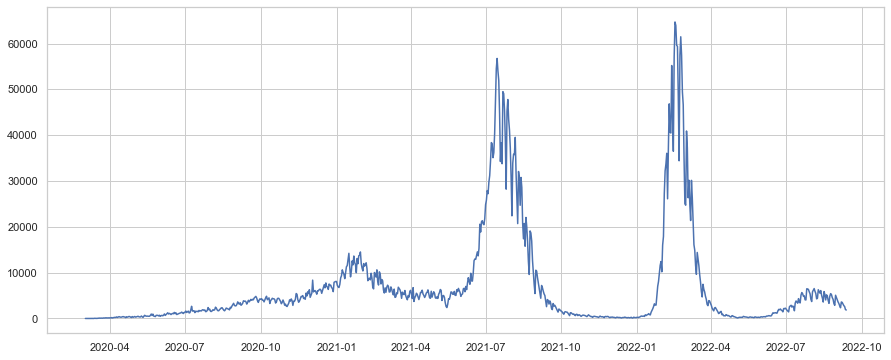

In [ ]:
plt.plot(ts)

## ACF dan PACF

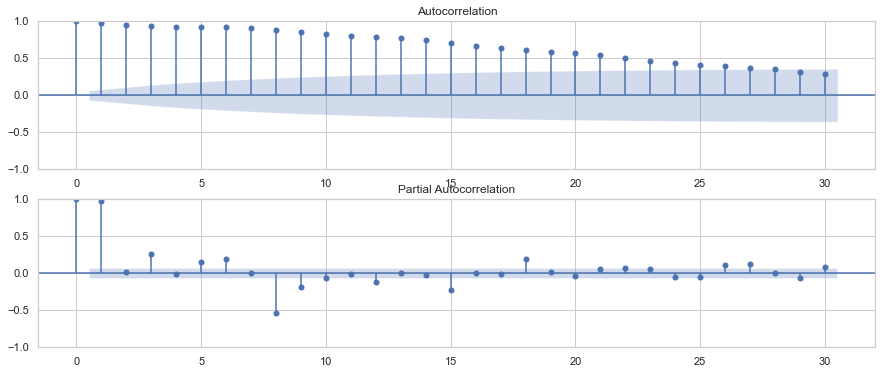

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(ts, ax=plt.gca(), lags=30)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=30)
plt.show()

## Modelling

In [ ]:
test_size = int(len(ts) * 0.2)

In [ ]:
train, test = data_ts.iloc[:-test_size], data_ts.iloc[-test_size:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], ts.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((740, 1), (740,), (185, 1), (185,))

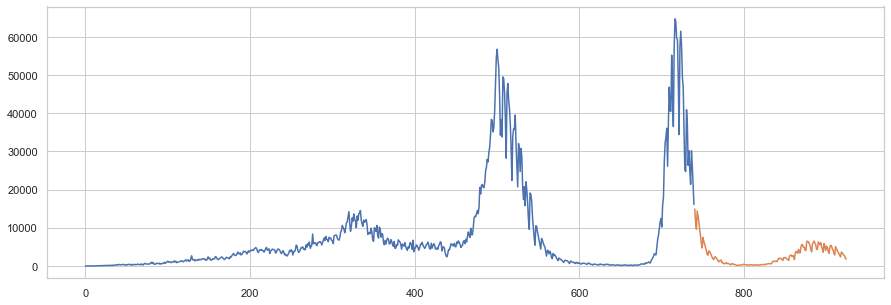

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

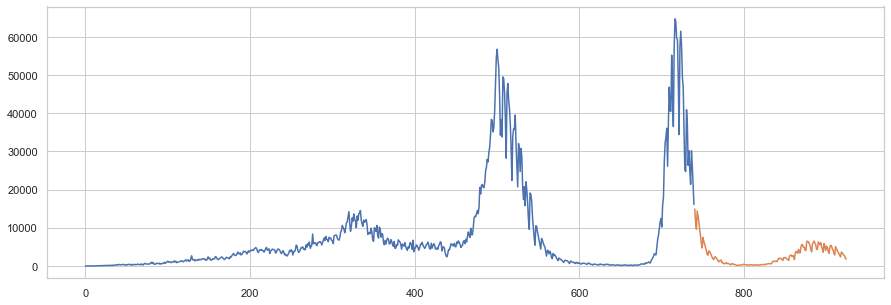

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train['positif'], label='train')
ax.plot(x_test, test['positif'], label='test')


In [ ]:
test['positif']

date
2022-03-12    14900
2022-03-13    11585
2022-03-14     9629
2022-03-15    14408
2022-03-16    13018
              ...  
2022-09-08     3138
2022-09-09     2804
2022-09-10     2609
2022-09-11     1939
2022-09-12     1848
Name: positif, Length: 185, dtype: int64

In [ ]:
test.head(3)

,positif
date,
2022-03-12,14900
2022-03-13,11585
2022-03-14,9629


In [ ]:
model = auto_arima(train,                       #data training yang akan dimodelkan
                      start_p=0,                #awal orde PACF yang dicek
                      start_q=0,                #awal orde ACF yang dicek
                      test='adf',
                      m=1,                      #menunjukkan period setiap season, karena tidak seasonal maka m=1
                      seasonal=False,           #tidak terdapat pola seasonal
                      method = 'bfgs',          #metode dalam mengoptimasi parameter, bfgs = broyden-fletcher-goldfarb-shanno
                      trace=True,               #mencetak beberapa status dari fits
                      error_action='ignore',    #error-handling
                      suppress_warnings=True,   #mematikan semua peringatan
                   )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16274.936, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13828.511, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15384.023, Time=0.75 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=13830.337, Time=0.90 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=13830.060, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13827.022, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16010.835, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13828.937, Time=1.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13828.784, Time=0.56 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15148.525, Time=1.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.79 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 10.491 seconds


ARIMA (p,d,q)
ARIMA (1, 0, 0) = AR(1)
ARIMA (0, 0, 1) = MA(1)
ARIMA (1, 0, 1) = ARMA(1,1)